# Predicting severe occurrences of automobile collisions in Seattle, WA

# **```Part 3: Modeling```**

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, jaccard_score, f1_score, log_loss

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
# Import EDA data from Part 2
df = pd.read_csv("Collisions_clean.csv")
print(df.head())

   OBJECTID           X          Y      ADDRTYPE SEVERITYDESC COLLISIONTYPE  \
0         0 -122.356511  47.517361  Intersection   Not Severe        Angles   
1         1 -122.361405  47.702064         Block   Not Severe    Rear Ended   
2         2 -122.317414  47.664028         Block   Not Severe       Head On   
3         3 -122.318234  47.619927  Intersection   Not Severe    Pedestrian   
4         4 -122.351724  47.560306         Block   Not Severe         Other   

   PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  ...  ROADCOND  \
0            2         0            0         2  ...       Dry   
1            2         0            0         2  ...       Wet   
2            2         0            0         2  ...       Dry   
3            3         1            0         1  ...       Wet   
4            2         0            0         1  ...  Snow/Ice   

                 LIGHTCOND                                         ST_COLDESC  \
0                 Daylight                     

In [3]:
print(df.info())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 214050 entries, 0 to 214049
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   OBJECTID         214050 non-null  int64  
 1   X                214050 non-null  float64
 2   Y                214050 non-null  float64
 3   ADDRTYPE         214050 non-null  object 
 4   SEVERITYDESC     214050 non-null  object 
 5   COLLISIONTYPE    214050 non-null  object 
 6   PERSONCOUNT      214050 non-null  int64  
 7   PEDCOUNT         214050 non-null  int64  
 8   PEDCYLCOUNT      214050 non-null  int64  
 9   VEHCOUNT         214050 non-null  int64  
 10  INJURIES         214050 non-null  int64  
 11  SERIOUSINJURIES  214050 non-null  int64  
 12  FATALITIES       214050 non-null  int64  
 13  INCDTTM          214050 non-null  object 
 14  JUNCTIONTYPE     214050 non-null  object 
 15  SDOT_COLDESC     214050 non-null  object 
 16  UNDERINFL        214050 

### Drop unwanted variables

In [4]:
df.drop(['OBJECTID', 'X', 'Y', 'COLLISIONTYPE', 'VEHCOUNT', 'PEDCOUNT', 'UNDERINFL', 'HITPARKEDCAR', 'PERSONCOUNT', 'PEDCYLCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDTTM', 'SDOT_COLDESC', 'ST_COLDESC', 'year', 'day', 'minute'],axis=1,inplace=True)
print(df.head())

       ADDRTYPE SEVERITYDESC                             JUNCTIONTYPE  \
0  Intersection   Not Severe   At Intersection (intersection related)   
1         Block   Not Severe  Mid-Block (not related to intersection)   
2         Block   Not Severe  Mid-Block (not related to intersection)   
3  Intersection   Not Severe   At Intersection (intersection related)   
4         Block   Not Severe  Mid-Block (not related to intersection)   

                  WEATHER  ROADCOND                LIGHTCOND  month  hour  \
0  Clear or Partly Cloudy       Dry                 Daylight      1     9   
1                 Raining       Wet                Dusk/Dawn      4    18   
2  Clear or Partly Cloudy       Dry  Dark - Street Lights On      3     2   
3                 Raining       Wet  Dark - Street Lights On      1    17   
4  Clear or Partly Cloudy  Snow/Ice  Dark - Street Lights On     12    19   

   weekday  
0        6  
1        0  
2        6  
3        0  
4        4  


In [5]:
print(df.info())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 214050 entries, 0 to 214049
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ADDRTYPE      214050 non-null  object
 1   SEVERITYDESC  214050 non-null  object
 2   JUNCTIONTYPE  214050 non-null  object
 3   WEATHER       214050 non-null  object
 4   ROADCOND      214050 non-null  object
 5   LIGHTCOND     214050 non-null  object
 6   month         214050 non-null  int64 
 7   hour          214050 non-null  int64 
 8   weekday       214050 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 14.7+ MB
None


### Label encoding: Convert categorical variables to discrete integers for model algorithms.

In [6]:
le = LabelEncoder()
df['ADDRTYPE'] = le.fit_transform(df['ADDRTYPE'])
df['SEVERITYDESC'] = le.fit_transform(df['SEVERITYDESC'].map(str))
df['JUNCTIONTYPE'] = le.fit_transform(df['JUNCTIONTYPE'])
df['WEATHER'] = le.fit_transform(df['WEATHER'])
df['ROADCOND'] = le.fit_transform(df['ROADCOND'])
df['LIGHTCOND'] = le.fit_transform(df['LIGHTCOND'])
#df['month'] = le.fit_transform(df['month'].map(str))
#df['hour'] = le.fit_transform(df['hour'].map(str))
#df['weekday'] = le.fit_transform(df['weekday'])

(df.head())

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,month,hour,weekday
0,1,0,1,0,0,3,1,9,6
1,0,0,4,2,3,4,4,18,0
2,0,0,4,0,0,1,3,2,6
3,1,0,1,2,3,1,1,17,0
4,0,0,4,0,1,1,12,19,4


***
# Methodology 
Our data is now ready to be fed into machine learning models.

We will use the following models:

### Decision Tree


### K-Nearest Neighbor (KNN)


### Logistic Regression

<br>

***
### Initialization
Define X and y: Independent variables and Dependent variable (Severity).

In [7]:
X = df.drop(['SEVERITYDESC'],axis=1)
y = df['SEVERITYDESC']
print(X.shape)
print(y.shape)

(214050, 8)
(214050,)


In [8]:
print(X.head())
print()
print(y.head())

   ADDRTYPE  JUNCTIONTYPE  WEATHER  ROADCOND  LIGHTCOND  month  hour  weekday
0         1             1        0         0          3      1     9        6
1         0             4        2         3          4      4    18        0
2         0             4        0         0          1      3     2        6
3         1             1        2         3          1      1    17        0
4         0             4        0         1          1     12    19        4

0    0
1    0
2    0
3    0
4    0
Name: SEVERITYDESC, dtype: int64


In [9]:
X [0:5]

,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,month,hour,weekday
0,1,1,0,0,3,1,9,6
1,0,4,2,3,4,4,18,0
2,0,4,0,0,1,3,2,6
3,1,1,2,3,1,1,17,0
4,0,4,0,1,1,12,19,4


In [10]:
y [0:5]

0    0
1    0
2    0
3    0
4    0
Name: SEVERITYDESC, dtype: int64

### Train/Test Split
Training data will use 70% of original dataset (df), and the testing data will use 30%.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (149835, 8) (149835,)
Test set: (64215, 8) (64215,)


In [12]:
X_train.head()

,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,month,hour,weekday
79381,0,2,0,0,3,8,16,3
100504,1,1,2,3,3,1,9,0
89633,0,4,0,0,3,4,18,3
28349,0,3,0,0,3,8,13,0
95617,0,4,0,0,4,7,20,3


#### Oversampling with the Synthetic Minority Oversampling TEchnique (SMOTE)
The dependent variable ```SEVERITYDESC``` is highly skewed, with the ```Severe``` catagory having approximately 1.6% of the data, and the remaining data in the ```Not Severe``` catagory.  To overcome this disparity, the ```Severe``` catagory will be oversampled with the algorithm SMOTE (Synthetic Minority Oversampling TEchnique).

In [13]:
# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

***
## Decision Tree

In [14]:
# Create an instance of the Decision Tree Classifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)

        # Fit the data with the training dataset
DT.fit(os_data_X,os_data_y)

        # Make some Predictions on the testing dataset
yhatDT = DT.predict(X_test)

        # Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))
print()
        # Visualization of Results
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy score for Decision Tree =  0.6475901269173869

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          41011  22146  63157
1            484    574   1058
All        41495  22720  64215


              precision    recall  f1-score   support

           0       0.99      0.65      0.78     63157
           1       0.03      0.54      0.05      1058

    accuracy                           0.65     64215
   macro avg       0.51      0.60      0.42     64215
weighted avg       0.97      0.65      0.77     64215



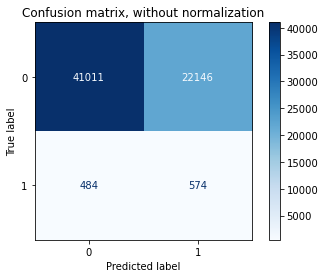

In [16]:
print (classification_report(y_test, yhatDT))

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(DT, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

***
## K-Nearest Neighbors (KNN)¶

### Determine optimal number of nearest neighbors, k.

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    # Create an instance of the KNN Classifier & fit the data with the training dataset
    neigh = KNeighborsClassifier(n_neighbors = n).fit(os_data_X, os_data_y)

    # Make some Predictions on the testing dataset
    yhatKN=neigh.predict(X_test)

    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatKN)
    std_acc[n-1]=np.std(yhatKN==y_test)/np.sqrt(yhatKN.shape[0])

mean_acc

array([0.80887643, 0.86314724, 0.79511018, 0.82803083, 0.78168652,
       0.80797321, 0.77153313, 0.79289886, 0.76360663])

Plot model accuracy for Different number of Neighbors

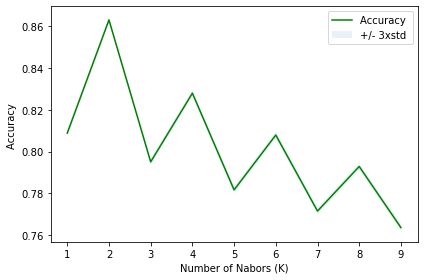

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8631472397414934 with k= 2


### KNN for optimal value of k=2

In [17]:
k = 2
#Train Model 
neigh = KNeighborsClassifier(n_neighbors = k).fit(os_data_X, os_data_y)

# predict with test data
yhatKN = neigh.predict(X_test)

# compute accuracy (metrics)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(os_data_y, neigh.predict(os_data_X)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKN))

Train set Accuracy:  0.8066641808752246
Test set Accuracy:  0.8631472397414934


              precision    recall  f1-score   support

           0       0.98      0.87      0.93     63157
           1       0.02      0.17      0.04      1058

    accuracy                           0.86     64215
   macro avg       0.50      0.52      0.48     64215
weighted avg       0.97      0.86      0.91     64215



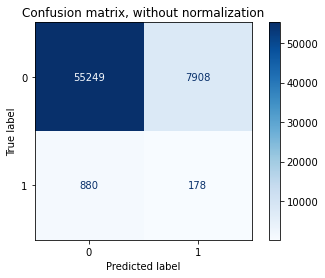

In [18]:
print (classification_report(y_test, yhatKN))

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

***
## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
# Build Model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X, os_data_y)
LR

LogisticRegression(C=6, solver=&#39;liblinear&#39;)

In [25]:
# Train & Predict
yhatLR = LR.predict(X_test)
yhatLR

array([0, 1, 0, ..., 1, 0, 0])

In [26]:
yhatLR_prob = LR.predict_proba(X_test)
yhatLR_prob

array([[0.57101503, 0.42898497],
       [0.31491655, 0.68508345],
       [0.55681464, 0.44318536],
       ...,
       [0.24559467, 0.75440533],
       [0.60302683, 0.39697317],
       [0.95569656, 0.04430344]])

              precision    recall  f1-score   support

           0       0.99      0.56      0.71     63157
           1       0.02      0.62      0.04      1058

    accuracy                           0.56     64215
   macro avg       0.51      0.59      0.38     64215
weighted avg       0.97      0.56      0.70     64215



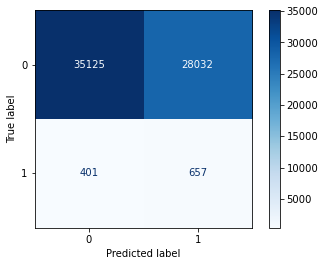

In [27]:
print (classification_report(y_test, yhatLR))

# Plot non-normalized confusion matrix
plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

***
## Compute Model Performance 
### Check the accuracy of the models

In [35]:
# Decision Tree
# Jaccard Similarity Score
DT_jaccard = jaccard_score(y_test, yhatDT)

# F1-SCORE
DT_f1 = f1_score(y_test, yhatDT, average='macro')

In [36]:
# K-Nearest Neighbor
# Jaccard Similarity Score
KN_jaccard = jaccard_score(y_test, yhatKN)

# F1-SCORE
KN_f1 = f1_score(y_test, yhatKN, average='macro')

In [37]:
# Logistic Regression
# Jaccard Similarity Score
LR_jaccard = jaccard_score(y_test, yhatLR)

# F1-SCORE
LR_f1 = f1_score(y_test, yhatLR, average='macro')

# LOGLOSS
LR_log_loss = log_loss(y_test, LR.predict_proba(X_test))

## Report

In [38]:
table = [["KNN", KN_jaccard, KN_f1,'NA'], ["Decision Tree",DT_jaccard, DT_f1,'NA'], ["LogisticRegression", LR_jaccard, LR_f1, LR_log_loss]]

from tabulate import tabulate
from IPython.display import HTML
HTML(tabulate(table, headers= ['Algorithm', 'Jaccard', 'F1-score','LogLoss'], tablefmt='html'))

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.0198528,0.48263,NA
Decision Tree,0.0247371,0.41602,NA
LogisticRegression,0.0225851,0.378024,0.6350334610405961
